In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import yfinance as yf

In [4]:
data = yf.download('AAPL', start = '2022-01-03', end = '2022-12-31')
data.reset_index(inplace = True)
data

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203201,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489624,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610184,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777817,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782562,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010124,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.550949,75703700


In [5]:
columns_to_4decimals = ['Open', 'High', 'Low', 'Close']
decimal_places = 4

data[columns_to_4decimals] = np.round(data[columns_to_4decimals], decimal_places)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.83,182.88,177.71,182.01,179.481125,104487900
1,2022-01-04,182.63,182.94,179.12,179.70,177.203201,99310400
2,2022-01-05,179.61,180.17,174.64,174.92,172.489624,94537600
3,2022-01-06,172.70,175.30,171.64,172.00,169.610184,96904000
4,2022-01-07,172.89,174.14,171.03,172.17,169.777817,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.92,132.42,129.64,131.86,130.782562,63814900
247,2022-12-27,131.38,131.41,128.72,130.03,128.967514,69007800
248,2022-12-28,129.67,131.03,125.87,126.04,125.010124,85438400
249,2022-12-29,127.99,130.48,127.73,129.61,128.550949,75703700


In [7]:
columns_to_drop = ['Adj Close']
data.drop(columns = columns_to_drop, inplace = True)


columns_order = ['Date', 'Open', 'Low', 'High', 'Volume', 'Close']
data = data[columns_order]
data

,Date,Open,Low,High,Volume,Close
0,2022-01-03,177.83,177.71,182.88,104487900,182.01
1,2022-01-04,182.63,179.12,182.94,99310400,179.70
2,2022-01-05,179.61,174.64,180.17,94537600,174.92
3,2022-01-06,172.70,171.64,175.30,96904000,172.00
4,2022-01-07,172.89,171.03,174.14,86709100,172.17
...,...,...,...,...,...,...
246,2022-12-23,130.92,129.64,132.42,63814900,131.86
247,2022-12-27,131.38,128.72,131.41,69007800,130.03
248,2022-12-28,129.67,125.87,131.03,85438400,126.04
249,2022-12-29,127.99,127.73,130.48,75703700,129.61


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
data

,Date,Open,Low,High,Volume,Close
0,03-01-2022,177.83,177.71,182.88,104487900,182.01
1,04-01-2022,182.63,179.12,182.94,99310400,179.70
2,05-01-2022,179.61,174.64,180.17,94537600,174.92
3,06-01-2022,172.70,171.64,175.30,96904000,172.00
4,07-01-2022,172.89,171.03,174.14,86709100,172.17
...,...,...,...,...,...,...
246,23-12-2022,130.92,129.64,132.42,63814900,131.86
247,27-12-2022,131.38,128.72,131.41,69007800,130.03
248,28-12-2022,129.67,125.87,131.03,85438400,126.04
249,29-12-2022,127.99,127.73,130.48,75703700,129.61


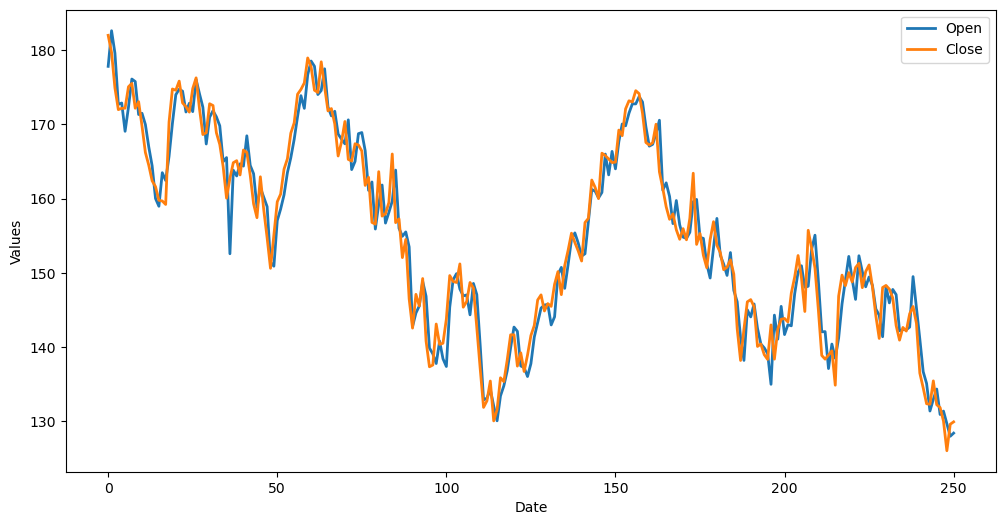

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(data['Open'], label = 'Open', linewidth = 2)
plt.plot(data['Close'], label = 'Close', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

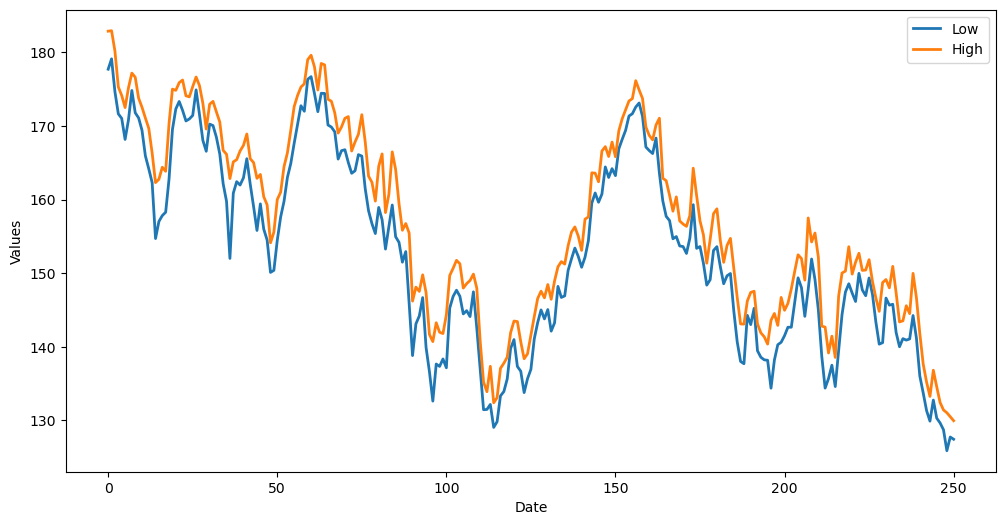

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(data['Low'], label = 'Low', linewidth = 2)
plt.plot(data['High'], label = 'High', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

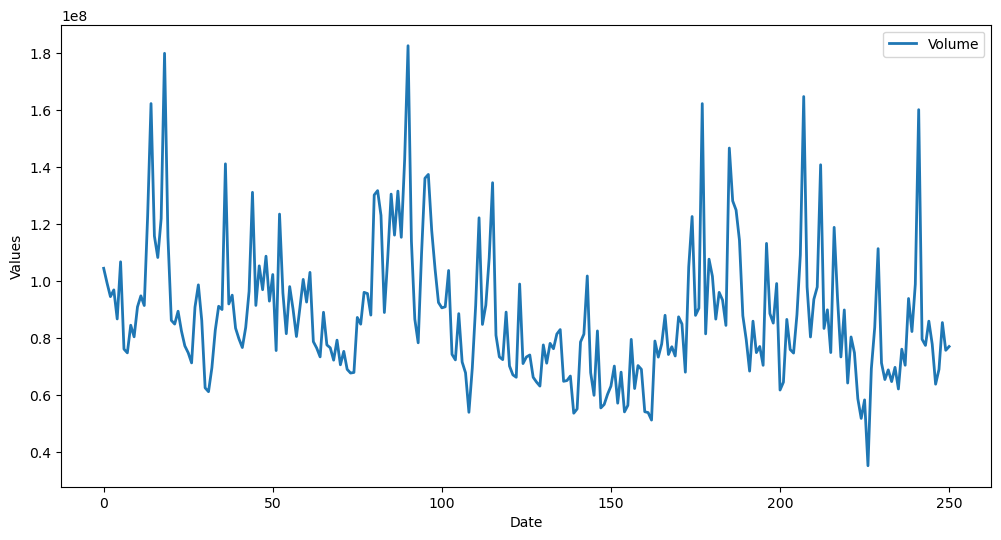

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(data['Volume'], label = 'Volume', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

In [19]:

X = data[['Open', 'Low', 'High', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)
print("y_train_shape:", y_train.shape)
print("y_test_shape:", y_test.shape)

X_train_shape: (200, 4)
X_test_shape: (51, 4)
y_train_shape: (200,)
y_test_shape: (51,)


In [21]:
X_train

,Open,Low,High,Volume
158,173.03,171.31,173.74,70346300
215,138.50,134.59,138.55,74917800
101,145.39,145.26,149.68,90978500
137,154.50,151.94,155.57,65086600
66,171.16,169.85,173.36,77594700
...,...,...,...,...
106,147.03,144.90,148.57,71598400
14,160.02,154.70,162.30,162294600
92,145.55,144.18,147.52,86643800
179,153.40,153.08,158.08,107689800


In [22]:
X_test

,Open,Low,High,Volume
155,172.78,171.66,173.71,56377100
6,172.32,170.82,175.18,76138300
164,161.15,159.82,162.90,73314000
60,178.55,176.70,179.61,92633200
113,134.29,132.16,137.34,91533000
182,151.19,148.56,151.47,96029900
198,141.07,140.27,142.90,85250900
248,129.67,125.87,131.03,85438400
9,171.34,171.09,173.78,80440800
118,136.82,135.63,138.59,72433800


In [23]:
y_train

158    171.52
215    134.87
101    149.64
137    155.35
66     172.14
        ...  
106    146.14
14     161.62
92     145.54
179    156.90
102    148.84
Name: Close, Length: 200, dtype: float64

In [24]:
y_test

155    173.03
6      175.08
164    161.38
60     177.77
113    135.43
182    150.43
198    142.41
248    126.04
9      173.07
118    138.27
175    155.31
217    149.70
219    150.04
139    152.95
67     170.09
225    151.07
195    138.34
15     159.78
120    141.66
24     171.66
241    134.51
19     174.78
115    131.56
68     165.75
177    150.70
45     162.95
55     170.21
10     169.80
30     172.79
234    140.94
237    144.49
33     167.30
220    148.79
196    142.99
25     174.83
126    142.92
18     170.33
73     167.40
132    148.47
82     157.96
119    141.66
97     143.11
79     156.57
84     166.02
192    140.09
16     159.69
86     157.28
124    138.93
181    152.74
38     165.12
173    163.43
Name: Close, dtype: float64

In [25]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a SVR model
svr_model = SVR(kernel = 'rbf', C = 100, epsilon = 0.1)

# Train the model 
svr_model.fit(X_train_scaled, y_train)

# Make prediction on the test set
predictions = svr_model.predict(X_test_scaled)

# Evalute the model
mse = mean_absolute_error(y_test, predictions)
print(predictions)
print("Mean Squared Error:", mse)

[172.90228351 173.56263563 161.65427866 178.25047468 135.21421346
 148.98270384 142.30863556 129.78816932 173.74486938 137.00348943
 156.38292751 148.24297113 149.79341352 152.96313706 169.55382718
 151.3702748  139.16778172 160.38897899 141.71257522 172.29512427
 138.47945251 172.0825329  131.49999823 166.07537088 150.14421155
 161.73768922 171.75049557 170.35660048 172.56323135 140.97628655
 142.586138   166.62640212 148.36312625 142.53733069 174.92565464
 143.53592731 164.45592682 166.46773265 147.65798139 154.23132629
 142.07529886 142.67824144 159.47150431 165.43513996 140.32948605
 158.53157556 156.89879888 137.83103942 153.39466899 165.32912342
 163.97563624]
Mean Squared Error: 0.9984608124908443


In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9984608124908443


In [31]:
from  sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the paremeter grid for grid search 
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0]
}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train_normalized, y_train)

best_params = grid_search.best_params_

# Train the model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_normalized, y_train)

# Make predictions on the test set
predictions = best_svr_model.predict(X_test_normalized)

# Evaluate the model 
mse = mean_squared_error(y_test, predictions)

# Print the results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}
Mean Squared Error: 1.1839744061720865


In [32]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, predictions)
accuracy_percentage = r2 * 100
print("R-squared (Accuracy) in Percentage:", accuracy_percentage)

R-squared (Accuracy) in Percentage: 99.3592433488141
